IMPORTAÇÕES

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

PLANILHAS

MONTANDO OS DADOS PARA UTILIZAR NOS GRÁFICOS

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

focos_mensal_dados_janeiro = pd.read_csv("dados/focos_mensal_br_202401.csv")

#                                     -------------------------------------------NORDESTE-------------------------------------------

risco_fogo = focos_mensal_dados_janeiro[['risco_fogo','municipio','estado']]

estados_nordeste = ['ALAGOAS', 'BAHIA', 'CEARÁ', 'MARANHÃO', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'RIO GRANDE DO NORTE', 'SERGIPE']

nordeste_municipios = focos_mensal_dados_janeiro[focos_mensal_dados_janeiro['estado'].isin(estados_nordeste)][['risco_fogo','estado','municipio']]

nordeste_municipios_risco_fogo = nordeste_municipios.sort_values(by='risco_fogo', ascending=False)

# display(nordeste_municipios.describe())
# display(nordeste_municipios_risco_fogo.head(10))

media_risco_estado_nordeste = nordeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_nordeste.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_nordeste.head(10))

#                                     -------------------------------------------NORTE----------------------------------------------

risco_fogo = focos_mensal_dados_janeiro[['risco_fogo','municipio','estado']]

estados_norte = ['ACRE', 'AMAPÁ', 'AMAZONAS', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS']

norte_municipios = focos_mensal_dados_janeiro[focos_mensal_dados_janeiro['estado'].isin(estados_norte)][['risco_fogo','estado','municipio']]

norte_municipios_risco_fogo = norte_municipios.sort_values(by='risco_fogo', ascending=False)

# display(norte_municipios.describe())
# display(norte_municipios_risco_fogo.head(10))

media_risco_estado_norte = norte_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_norte.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_norte.head(10))

#                                     -------------------------------------------CENTRO-OESTE---------------------------------------

risco_fogo = focos_mensal_dados_janeiro[['risco_fogo','municipio','estado']]

estados_centro = ['GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'DISTRITO FEDERAL']

centro_municipios = focos_mensal_dados_janeiro[focos_mensal_dados_janeiro['estado'].isin(estados_centro)][['risco_fogo','estado','municipio']]

centro_municipios_risco_fogo = centro_municipios.sort_values(by='risco_fogo', ascending=False)

# display(centro_municipios.describe())
# display(centro_municipios_risco_fogo.head(10))

media_risco_estado_centro = centro_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_centro.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_centro.head(10))

#                                     -------------------------------------------SUDESTE--------------------------------------------

risco_fogo = focos_mensal_dados_janeiro[['risco_fogo','municipio','estado']]

estados_sudeste = ['MINAS GERAIS', 'SÃO PAULO', 'RIO DE JANEIRO', 'ESPÍRITO SANTO']

sudeste_municipios = focos_mensal_dados_janeiro[focos_mensal_dados_janeiro['estado'].isin(estados_sudeste)][['risco_fogo','estado','municipio']]

sudeste_municipios_risco_fogo = sudeste_municipios.sort_values(by='risco_fogo', ascending=False)

# display(sudeste_municipios.describe())
# display(sudeste_municipios_risco_fogo.head(10))

media_risco_estado_sudeste = sudeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_sudeste.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_sudeste.head(10))

# SUDESTE

#                                     -------------------------------------------SUL------------------------------------------------

risco_fogo = focos_mensal_dados_janeiro[['risco_fogo','municipio','estado']]

estados_sul = ['PARANÁ', 'SANTA CATARINA', 'RIO GRANDE DO SUL']

sul_municipios = focos_mensal_dados_janeiro[focos_mensal_dados_janeiro['estado'].isin(estados_sul)][['risco_fogo','estado','municipio']]

sul_municipios_risco_fogo = sul_municipios.sort_values(by='risco_fogo', ascending=False)

# display(sul_municipios.describe())
# display(sul_municipios_risco_fogo.head(10))

media_risco_estado_sul = sul_municipios.groupby('estado')['risco_fogo'].mean().reset_index().sort_values(by='risco_fogo', ascending=False)

media_risco_estado_sul.columns = ['Estado', 'Média Risco de Fogo']

# display(media_risco_estado_sul.head(10))

# SUL

TRANSFORMANDO EM GRÁFICOS(SUL)

,estado,risco_fogo
0,PARANÁ,0.324587
1,RIO GRANDE DO SUL,0.066957
2,SANTA CATARINA,0.058730


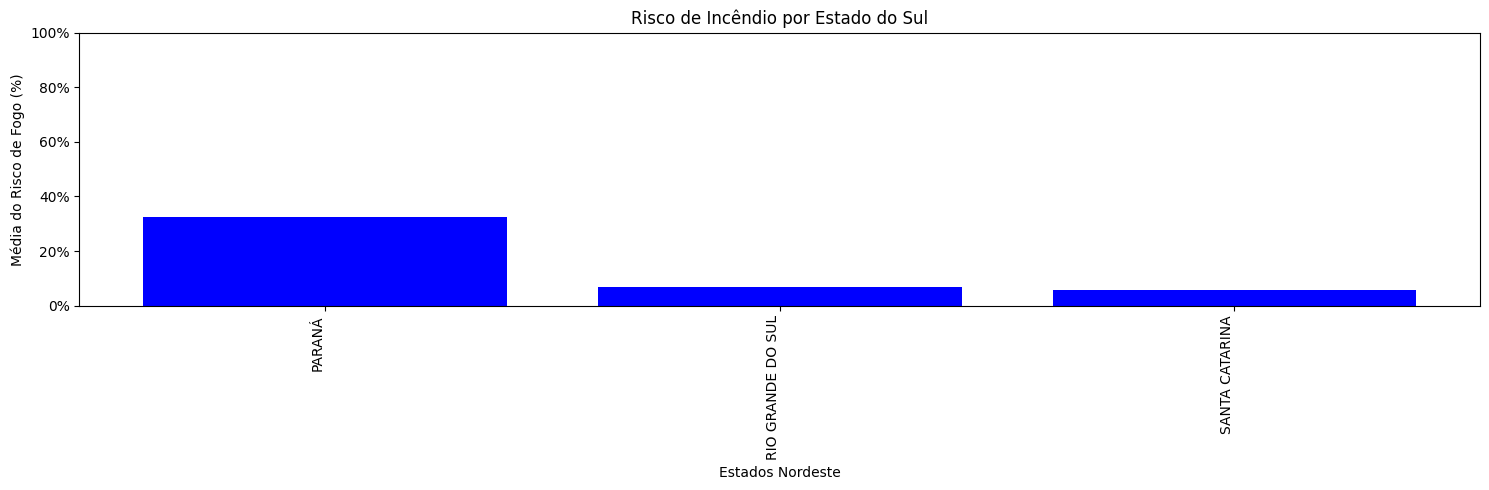

In [28]:
# Remover valores -999 da coluna 'risco_fogo'
sul_municipios = sul_municipios[sul_municipios['risco_fogo'] != -999]

# Calcular a média do risco de fogo por estado
media_risco_estado = sul_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

display(media_risco_estado)

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 100

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Sul')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo (%)')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100) #limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

TRANSFORMANDO EM GRÁFICOS(SUDESTE)

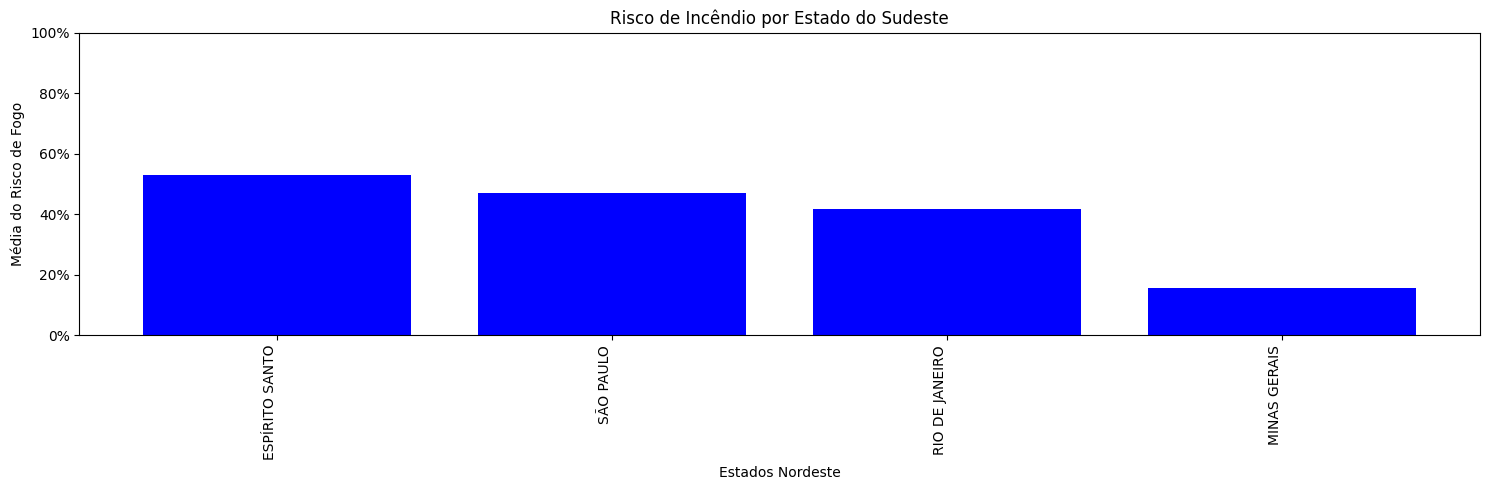

In [31]:
sudeste_municipios = sudeste_municipios[sudeste_municipios['risco_fogo'] != -999]

# Calcular a média do risco de fogo por estado
media_risco_estado = sudeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 100

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Sudeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100) #limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(CENTRO-OESTE)

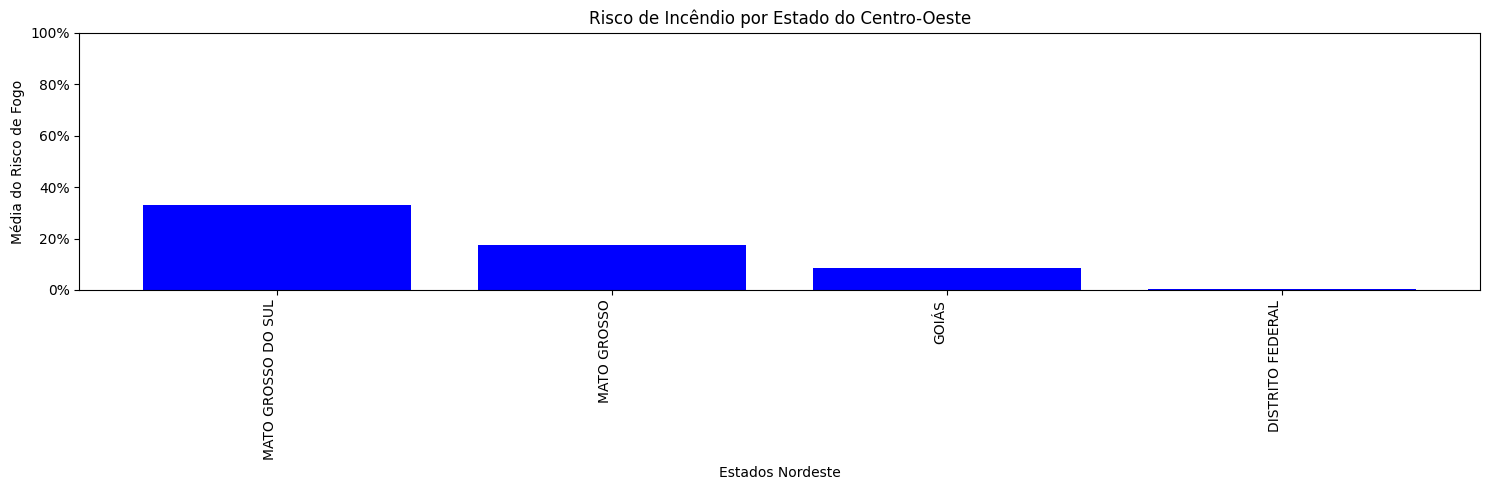

In [32]:
centro_municipios = centro_municipios[centro_municipios['risco_fogo'] != -999]

# Calcular a média do risco de fogo por estado
media_risco_estado = centro_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 100

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Centro-Oeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100) #limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(NORTE)

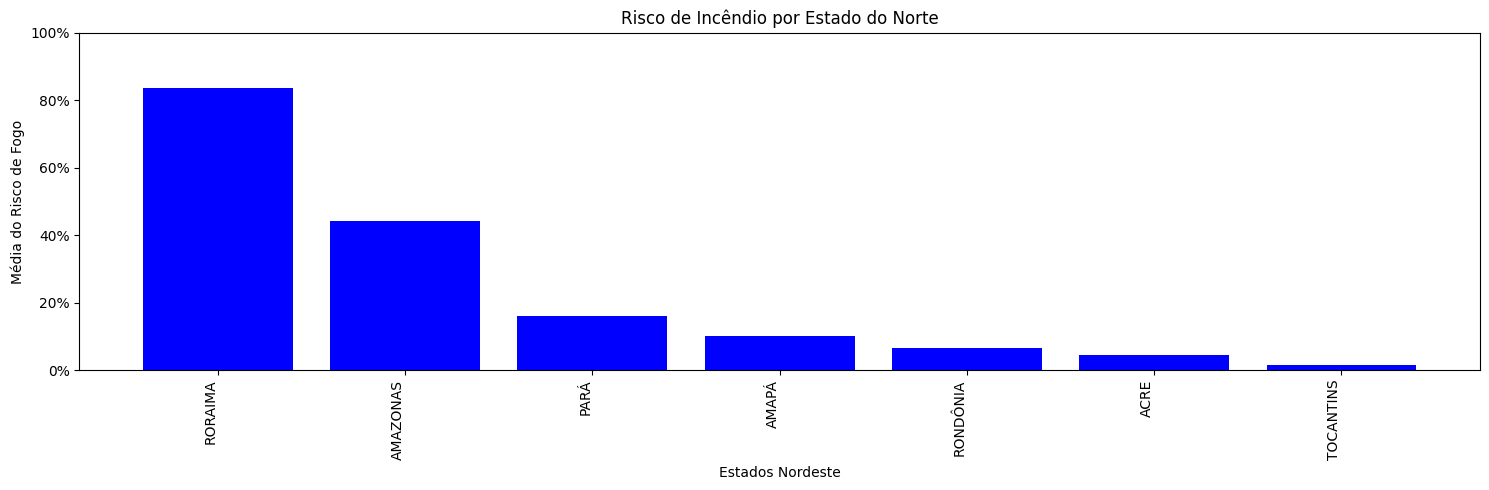

In [34]:
norte_municipios = norte_municipios[norte_municipios['risco_fogo'] != -999]

# Calcular a média do risco de fogo por estado
media_risco_estado = norte_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 100

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Norte')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100) #limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


TRANSFORMANDO EM GRÁFICOS(NORDESTE)

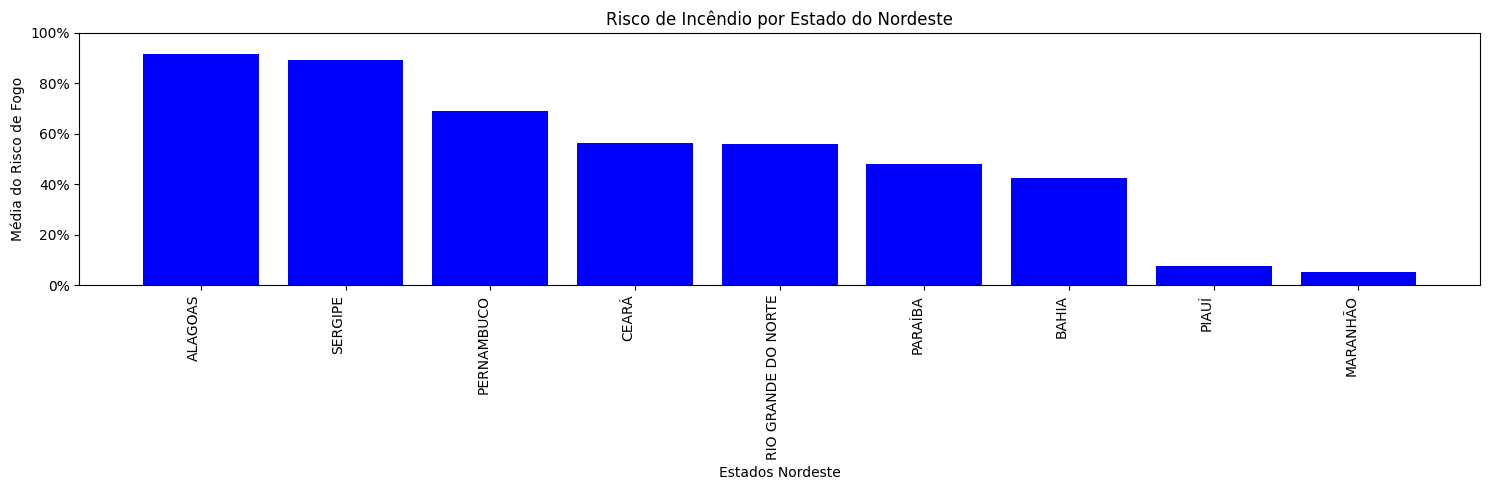

In [35]:
nordeste_municipios = nordeste_municipios[nordeste_municipios['risco_fogo'] != -999]

# Calcular a média do risco de fogo por estado
media_risco_estado = nordeste_municipios.groupby('estado')['risco_fogo'].mean().reset_index()

media_risco_estado['risco_fogo'] = media_risco_estado['risco_fogo'].abs() * 100

# Ordenar o DataFrame pela média do risco de fogo
media_risco_estado = media_risco_estado.sort_values(by='risco_fogo', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(15, 5))  # Tamanho da figura
plt.bar(media_risco_estado['estado'], media_risco_estado['risco_fogo'], color='blue', alpha=1)

# Adicionar título e rótulos aos eixos
plt.title('Risco de Incêndio por Estado do Nordeste')
plt.xlabel('Estados Nordeste')
plt.ylabel('Média do Risco de Fogo')

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90, ha='right')

# Configurar o eixo y para mostrar porcentagens
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Ajustar o limite do eixo y para uma melhor visualização
plt.ylim(0, 100) #limitar a 100%

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()
